In [17]:
import json
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
def load_result(model_name, dataset):
    root = f"/mnt/ssd/ronak/output/imagenet_captions_50k/{model_name}"
    with open(os.path.join(root, f"{dataset}.json")) as f:
        result = json.load(f)
    return result


In [19]:
model_name = "default"
dataset = "cifar10"

load_result(model_name, dataset)

{'dataset': 'cifar10',
 'model': 'default',
 'pretrained': 'laion2b_s34b_b79k',
 'task': 'zeroshot_classification',
 'metrics': {'acc1': 0.5883, 'acc5': 0.9805, 'mean_per_class_recall': 0.5879},
 'language': 'en'}

Text(0.5, 1.02, 'Zero Shot Accuracy of CLIP Model Variants')

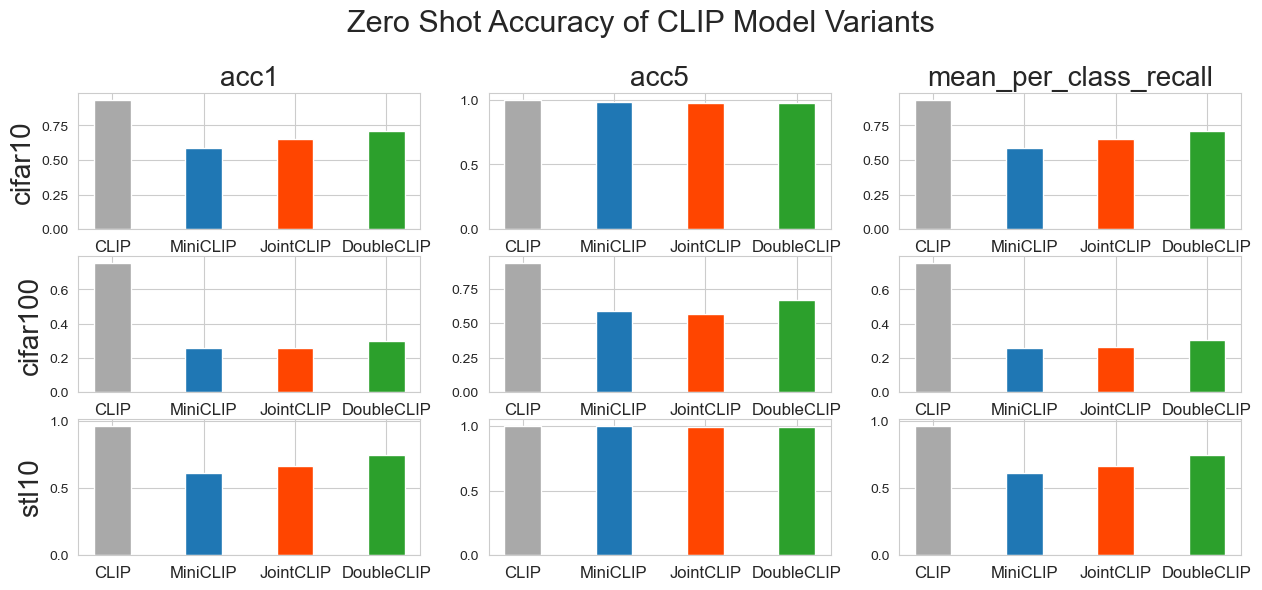

In [39]:
colors = ["darkgray", "tab:blue", "orangered", "tab:green"]
datasets = [
    "cifar10", 
    "cifar100", 
    "stl10", 
    # "caltech101"
]
metrics = ["acc1", "acc5", "mean_per_class_recall"]
models = ["ViT-B-32", "default", "jointly_centered", "doubly_centered"]
model_labels = ["CLIP", "MiniCLIP", "JointCLIP", "DoubleCLIP"]

sns.set_style("whitegrid")

width = 0.4
fig, ax = plt.subplots(len(datasets), len(metrics), figsize=(5 * len(metrics), 2 * len(datasets)))

for i, dataset in enumerate(datasets):
    results = {model_name: load_result(model_name, dataset) for model_name in models}
    ax[i, 0].set_ylabel(dataset, fontsize=20)
    for j, metric in enumerate(metrics):
        ax[0, j].set_title(metric, fontsize=20)
        heights = [results[model_name]['metrics'][metric] for model_name in models]
        ax[i, j].bar(np.arange(len(models)), heights, width=width, color=colors)
        ax[i, j].set_xticks(np.arange(len(models)))
        ax[i, j].set_xticklabels(model_labels, fontsize=12)
fig.suptitle("Zero Shot Accuracy of CLIP Model Variants", fontsize=22, y=1.02)